# Backpropagation Practice

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [55]:
import numpy as np
np.random.seed(1)

X = np.array([[0,0,1],
                   [0,1,1],
                   [1,0,1],
                   [0,1,0],
                  [1,0,0],
                  [1,1,1],
                  [0,0,0]])

y = np.array([[0],
     [1],
     [1],
     [1],
     [1],
     [0],
     [0]])

In [56]:
y.shape

(7, 1)

### Let's create a Neural_network class

In [57]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes =1
        
        # Initialize weights
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) #(2x3)
#       self.L2_weights = np.random.randn(self.hiddenNodes, self.hiddenNodes)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)
        

### let's print th weights we generated 

In [58]:
NN = Neural_Network()

In [59]:
print("Layer 1 weights: \n", NN.L1_weights)
print("Layer 2 weights: \n", NN.L2_weights)

Layer 1 weights: 
 [[ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038  1.46210794 -2.06014071]]
Layer 2 weights: 
 [[-0.3224172 ]
 [-0.38405435]
 [ 1.13376944]
 [-1.09989127]]


### Implementing Feedforward Functionality 

In [60]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes =1
        
        # Initialize weights
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) #(2x3)
#       self.L2_weights = np.random.randn(self.hiddenNodes, self.hiddenNodes)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations on weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
        


### let's generate the output

In [61]:
NN = Neural_Network()
output = NN.feed_forward(x)
print("output: ", output)

output:  [[0.38959854]
 [0.39520279]
 [0.35793904]
 [0.40041658]
 [0.36021476]
 [0.35615307]
 [0.39819936]]


### calculate error

In [62]:
print (y-output)

[[-0.38959854]
 [ 0.60479721]
 [ 0.64206096]
 [ 0.59958342]
 [ 0.63978524]
 [-0.35615307]
 [-0.39819936]]


### Backpropogation 

In [63]:
print("Inputs: \n", X)
print("Initial Weights \n", NN.L1_weights)
print("Weighted Sum 1 \n", NN.hidden_sum)
print("Activations from first layer: \n", NN.activated_hidden)
print("Second layer Weights \n", NN.L2_weights)
print("Weighted Sum 2 \n", NN.output_sum)
print("Predictions \n", output)
print("Correct Output: \n", y)
print("Error \n", y-output)

Inputs: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Initial Weights 
 [[-0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434]
 [ 0.90085595 -0.68372786 -0.12289023 -0.93576943]]
Weighted Sum 1 
 [[ 0.90085595 -0.68372786 -0.12289023 -0.93576943]
 [-0.19976323  0.46099585  0.7787005  -0.4332751 ]
 [ 0.72842774 -1.56158628 -0.08067648 -0.35295422]
 [-1.10061918  1.14472371  0.90159072  0.50249434]
 [-0.17242821 -0.87785842  0.04221375  0.58281521]
 [-0.37219144 -0.41686257  0.82091424  0.14954012]
 [ 0.          0.          0.          0.        ]]
Activations from first layer: 
 [[0.71112537 0.33542979 0.46931605 0.28175569]
 [0.45022461 0.61325039 0.68539997 0.39334454]
 [0.67446016 0.17341914 0.47984181 0.41266621]
 [0.2496239  0.75854586 0.71127629 0.62304533]
 [0.45699943 0.29362176 0.51055187 0.64171493]
 [0.4080116  0.39726775 0.69443037 0.53731552]
 [0.5        0.5        0.5        0.5       ]]
Second layer Weig

In [64]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes =1
        
        # Initialize weights
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) #(2x3)
#       self.L2_weights = np.random.randn(self.hiddenNodes, self.hiddenNodes)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations on weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, X, y, o):
        #backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid ot error
        
        self.z2_error = self.o_delta.dot(self.L2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error
        
        self.L1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.L2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)
    

In [65]:
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
    if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
        print('+----------EPOCH', i+1, '----------+')
        print("Input: \n", X)
        print("Actual Output: \n", y)
        print("Predicted Output: \n" + str(NN.feed_forward(X)))
        print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) #mean sum squared loss
        print("\n")
    NN.train(X,y)

+----------EPOCH 1 ----------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
[[0.84189004]
 [0.86529986]
 [0.8489874 ]
 [0.77557764]
 [0.71782001]
 [0.87277068]
 [0.7010895 ]]
Loss: 
0.30471055257769036


+----------EPOCH 2 ----------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
[[0.80484792]
 [0.82891609]
 [0.82000855]
 [0.72666681]
 [0.68345122]
 [0.84342196]
 [0.6527522 ]]
Loss: 
0.2888295696524673


+----------EPOCH 3 ----------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
[[0.7637135 ]
 [0.78794133]
 [0.78843784]
 [0.67601178]
 [0.64915792]
 [0.81094442]
 [0.60428066]]
Loss: 
0.2748328904705085


+----------EPOCH 4 ----------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [28]:
!pip install mlxtend 

  Using cached https://files.pythonhosted.org/packages/16/e6/30e50ed9c053a1530c83149090e1f5fd9fccc8503dca2ecce1bb52f34de0/mlxtend-0.15.0.0-py2.py3-none-any.whl


In [67]:
from mlxtend.data import mnist_data
X, y = mnist_data()

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('1st row', X[0])

Dimensions: 5000 x 784
1st row [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0. 

In [70]:
y = np.reshape(y,(-1, 1))

In [71]:
y.shape

(5000, 1)

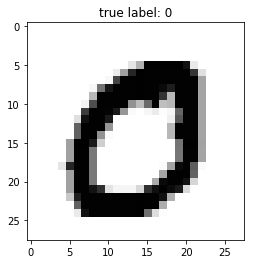

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 4)  

In [74]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = 784
        self.hiddenNodes = 800
        self.outputNodes =10
        
        # Initialize weights
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) #(2x3)
#       self.L2_weights = np.random.randn(self.hiddenNodes, self.hiddenNodes)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations on weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, X, y, o):
        #backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid ot error
        
        self.z2_error = self.o_delta.dot(self.L2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error
        
        self.L1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.L2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)
    

In [75]:
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
    if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
        print('+----------EPOCH', i+1, '----------+')
        print("Input: \n", X)
        print("Actual Output: \n", y)
        print("Predicted Output: \n" + str(NN.feed_forward(X)))
        print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) #mean sum squared loss
        print("\n")
    NN.train(X,y)

+----------EPOCH 1 ----------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]
Predicted Output: 
[[2.86456623e-06 9.99998799e-01 4.63660877e-13 ... 1.77239090e-07
  1.00000000e+00 5.73544957e-03]
 [9.51890757e-01 1.00000000e+00 3.64089547e-05 ... 3.81096781e-12
  9.90495419e-01 8.49270966e-04]
 [1.02010593e-08 1.00000000e+00 1.78140417e-16 ... 1.02006263e-09
  8.43579442e-03 1.00000000e+00]
 ...
 [1.23062748e-07 9.97963591e-01 1.51596675e-08 ... 9.27507954e-06
  9.99999738e-01 9.99999952e-01]
 [1.18672059e-11 9.99999992e-01 2.41062883e-04 ... 7.68460440e-10
  9.80514356e-01 9.99999704e-01]
 [9.98764375e-01 7.06738243e-01 9.99975248e-01 ... 4.34931027e-02
  9.62467461e-01 9.99999999e-01]]
Loss: 
23.943994889982687


+----------EPOCH 2 ----------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

Loss: 
20.5


+----------EPOCH 700 ----------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]
Predicted Output: 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Loss: 
20.5


+----------EPOCH 750 ----------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]
Predicted Output: 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Loss: 
20.5


+----------EPOCH 800 ----------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

In [42]:
X.shape, y.shape

((5000, 784), (5000,))

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?